# SEMTM0016 Week 22: Policy based Reinforcement Learning

## Instructions
1.   To start this notebook, please duplicate this notebook at first:
  - Choose "File => Save a copy in Drive" and open/run it in Colab.
  - Or you can download the notebook and run it in your local jupyter notebook server.
2.   For the coding assignment and practice, please write your code at `### TODO ###` blocks or in a new cell. For analysis report, you are free to use as many blocks as you need.

# Section I: Policy-based Reinforcement Learning
In previous value-based Reinforcement Learning, we basically maintain a value function and the policy is generated directly from the value function. In this section, we focus on model-free policy based Reinforcement Learning.

In this setting, we use $\theta$ to directly parameterise the policy:
$$
\pi_{\theta}(a|s)=\mathbb{P}_{\theta}[a \mid s]
$$

In order to get better policy, we need to quantify the objective/measurement of the policy, bascially, these exists three common objectives. Recall the definition of state value function and state-action value function.

$$
V_{\pi}(s)=\mathbb{E}_{\pi}\left[\sum_{k=0}^{\infty} \gamma^{k} R_{t+k+1} \mid S_{t}=s\right]
$$
$$
Q_{\pi}(s, a)=\mathbb{E}_{\pi}\left[\sum_{k=0}^{\infty} \gamma^{k} R_{t+k+1} \mid S_{t}=s, A_{t}=a\right]
$$

Under episodic environments, the value function of the first state can be used. Here episodic environments refer to the tasks that have a terminal state.
$$
J_{1}(\theta)=V^{\pi_{\theta}}\left(s_{1}\right)=\mathbb{E}_{\pi_{\theta}}\left[v_{1}\right]
$$

In continuing environments we can use the average value. In contrast to episodic environments, continuing environments refer to the tasks that have infinite length with no terminal state.

$$
J_{a v V}(\theta)=\sum_{s} d^{\pi_{\theta}}(s) V^{\pi_{\theta}}(s)
$$

Or we can also use average reward per time-step.
$$
J_{a v R}(\theta)=\sum_{s} d^{\pi_{\theta}}(s) \sum_{a} \pi_{\theta}(s, a) \mathcal{R}_{s}^{a}
$$

where $d^{\pi_{\theta}}(s)$ is the stationary state distribution of Markov Chain mentioned in the lecture.


## Q1: Analytical Value Function and Policy Gradient in Tabular Markov Decision Process
If we know the environment dynamics: transition matrix andreward matrix, we can analytically calculate the objective function defined above. Here we offer a tabular markov decision process (MDP) example to help you understand it.

In this part, you are going to do these three steps:

* **Step I**: We will give you the necessary symbols and some examples to help you get the mathmatical formulation of value function. You need to give out the mathmatical formulation for the left things.
* **Step II**: We will give you an example of tabular MDP and some necessary codes. Given the mathmatical formulation derived in Step I, you need to implement code to calculate analytical solution of value function and its gradient w.r.t the policy parameters.
* **Step III**: Based on the analytical gradient derived in Step II, you can conduct analytical policy gradient ascent to increase the performance.


### Step I: Analytical solution of value function

We can calculate the Bellman expectation equation in matrix form. In a tabular example, let us denote dimension of state $S$ as $|S|$, dimension of action $A$ as $|A|$, the value matrix $V\in \mathbb{R}^{|S|}$, the reward matrix $R\in \mathbb{R}^{|S|\times|A|}$, the transition matrix $P\in \mathbb{R}^{|S|\times|A|\times|S|}$, the policy matrix $\pi \in \mathbb{R}^{|S|\times|A|}$. The following Bellman equation holds:

\begin{equation}
V(s) = \sum_{a}\pi (a|s)r(s,a) + \gamma\sum_{a}\pi(a|s)\sum_{s'} P(s'|s,a) V(s')
\end{equation}

And if we can rearrange it in matrix form, like the equation below:

\begin{equation}
V^{\pi} = R^{\pi} + \gamma P^{\pi}V^{\pi} \tag{1}
\end{equation}

where $V^{\pi}\in\mathbb{R}^{|S|}$ denotes the value matrix for policy $\pi$, $R^{\pi}\in\mathbb{R}^{|S|}$ represents the immediate reward given by the reward matrix and policy $\pi$, $P^{\pi}\in\mathbb{R}^{|S|\times|S|}$ represents the policy based state transition matrix given transition matrix $P$ and policy $\pi$. Then we are able to directly calculate the value function by solving this equation:

\begin{equation}
V^{\pi} = (I - \gamma P^{\pi})^{-1}R^{\pi}
\end{equation}

$R^{\pi}$ is easy to calculate by $\sum_{a}R \cdot \pi$, where $\cdot$ denotes the element-wise multiplication and $\sum_{a}$ refers to the summation over action dimension.

**In this part, you need to do the following things**:

* Following the similar way of constructing $R^{\pi}$ to consturct the matirx form of $P^{\pi}$ in mathmatically using policy $\pi$ and transition matrix $P$. It might be hard to rigorously write down the mathmatical formulation, you can also try to depict the procedures to calculate $P^{\pi}$ with symbols and words.


**Answer**:
$$P^{\pi} = \sum_a P \otimes \pi$$
Here this equation can be implemented as follows: Note that $P\in \mathbb{R}^{|S|\times|A|\times|S|}$ and $\pi \in \mathbb{R}^{|S|\times|A|}$. We need to broadcast $\pi \in \mathbb{R}^{|S|\times|A|}$ to $\pi \in \mathbb{R}^{|S|\times|A|\times|S|}$ by repeating itself for $|S|$ times. Then we can take element-wise multiplication between $P$ and $\pi$ then take the summation over the action dimension.

Another way to represent it (not from matrix-form)

\begin{equation}
\begin{aligned}
\mathcal{P}_{s, s^{\prime}}^{\pi} &=\sum_{a \in \mathcal{A}} \pi(a \mid s) \mathcal{P}_{s s^{\prime}}^{a} \\
\mathcal{R}_{s}^{\pi} &=\sum_{a \in \mathcal{A}} \pi(a \mid s) \mathcal{R}_{s}^{a}
\end{aligned}
\tag{2}
\end{equation}

### Step II:

Given the matirx form we have in step I, in this part you need to implement the function to calculate the analytical solution of value matrix. Another benefit of this analytical solution is that we can directly calculate the analytical solution of policy gradient $\frac{\partial V^{\pi}(s_0)}{\partial {\pi}}$ with automatic differentiation, where $s_0$ refers to the initial state. So here we are choosing the $J_{1}(\theta)$ objective function. In this exercise, we will give you a tabular MDP environment with tabular reward matrix and tabular transition matrix.

**You need to do the following things:**

* Fully read the tabular MDP environment code to understand how it works
* Complete the **policy evaluation** function. Implement the function to calculate the analytical solution of value function based on the results we derive in step I.
* Complete the **policy gradient** function. Implement the function to calculate the analytical solution of policy gradient based on automatic differentiation toolbox.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F

In [ ]:
# ns = 3, na = 2, there exist 3 states and 2 actions.
# The transition probiability matrix is [(ns*na), ns] so the sum of each row is 1.0.
# P(s'|s,a) = P[s * na + a][s']

ns = 3
na = 2
P = np.array([
	    	[0.6, 0.2, 0.2],
        [0.5, 0.5, 0.0],
				[0.2, 0.5, 0.3],
				[0.3, 0.0, 0.7],
				[0.2, 0.6, 0.2],
				[0.1, 0.4, 0.5]
				])
# The reward matrix is [ns, na]. R(s,a) = R[s,a]
R = np.array([
	      [1.0, -1.0],
				[-0.5, 0.5],
				[2, 0.5],
				])

class TabularMDP(object):
	"""
	A tabular MDP with gym-like interface
	"""

	def __init__(self, ns, na, P, R):

		self.ns = ns
		self.na = na

		# transition: shape with [(ns*na), ns]
		self.P = P

		# reward: shape with [ns, na]
		self.r_mean = R

		# fixed initial state = 0
		self.s = 0

		# convert to matrix quantity
		self.R_matrix = np.zeros([ns * na])
		for i in range(ns):
			for j in range(na):
				self.R_matrix[i * na + j] = self.r_mean[i][j]

	def reset(self):
		self.s = 0
		return self.s

	def step(self, action):
		# next state
		next_s_prob = self.P[self.s * self.na + action]
		next_s = np.random.choice(np.arange(self.ns), p=next_s_prob)

		# reward
		r = self.r_mean[self.s][action]

		# update
		self.s = next_s

		return self.s, r, False, {}

def get_PR(mdp):
	"""
	Extract transition matrix P and reward vector R from a mdp object
	Args:
		mdp: the MDP object
	Returns:
		The matrix P and vector R
	"""
	ns, na = mdp.ns, mdp.na
	P = np.zeros([na, ns, ns])
	R = np.zeros([ns, na])
	for i in range(na):
		for j in range(ns):
			P[i, j] = mdp.P[j * na + i]
	R = np.reshape(mdp.R_matrix, [ns, na])
	return P, R

mdp = TabularMDP(ns, na, P, R)

P, R = get_PR(mdp)
P, R = torch.tensor(P).float(), torch.tensor(R).float()
print(P, P.shape) # [action_dim, state_dim, state_dim]
print(R, R.shape) # [state_dim, action_dim]

tensor([[[0.6000, 0.2000, 0.2000],
         [0.2000, 0.5000, 0.3000],
         [0.2000, 0.6000, 0.2000]],

        [[0.5000, 0.5000, 0.0000],
         [0.3000, 0.0000, 0.7000],
         [0.1000, 0.4000, 0.5000]]]) torch.Size([2, 3, 3])
tensor([[ 1.0000, -1.0000],
        [-0.5000,  0.5000],
        [ 2.0000,  0.5000]]) torch.Size([3, 2])


In [ ]:
def policy_evaluation(P, R, discount, policy):
	"""
	Policy evaluation solver. Compute the exact values for a target policy.
	Args:
		P: transition matrix
		R: reward vector
		discount: discount factor
		policy: target policy
	Returns:
		Exact value function (vf)
	"""

  ### In this part, we recommend that you can directly use PyTorch to calculate
  ### the analytical solution so you can further take gradient of it
	### Use any way you like to calculate it
	### torch.einsum is recommended: https://pytorch.org/docs/master/generated/torch.einsum.html#torch-einsum

	### TODO: Implement policy_evaluation based on the equation (1) and (2) derived in Step I###
	nstates = P.shape[-1]
	ppi = torch.einsum('ast,sa->st', P, policy)
	rpi = torch.einsum('sa,sa->s', R, policy)
	vf = torch.linalg.solve(torch.eye(nstates) - discount*ppi, rpi)
	### END TODO ###
	return vf

def policy_gradient(vf, policy):
  ### You can refer to https://pytorch.org/docs/stable/autograd.html to see how you can take gradient manually

	### TODO: Implement policy gradient calculation ###
  grad = torch.autograd.grad(vf, policy)[0]
	### END TODO ###
  return grad

### policy as matrix (|S|,|A|)
params = torch.zeros([ns, na], requires_grad=True)
gamma = 0.8
policy = F.softmax(params, dim=-1) ## Guarantee the sum of each row is 1.0

# get oralce gradient
analytic_value = policy_evaluation(P, R, gamma, policy)
analytic_pg = policy_gradient(analytic_value[0], policy)

print('Analytical Value:', analytic_value)
print('Analytical Policy Gradient over the first state:', analytic_pg[0])

Analytical Value: tensor([1.3324, 1.8169, 2.9675], grad_fn=<LinalgSolveBackward0>)
Analytical Policy Gradient over the first state: tensor([6.0592, 0.6543])


### Step III: Analytical policy gradient ascent

**You need to do the following things:**
* Given the value function and policy gradient code above, conduct policy gradient ascent from uniform policy to increase the return. The necessary parameters like learning rate/gamma will be given. Then you can use the code to draw the plot between return and steps.

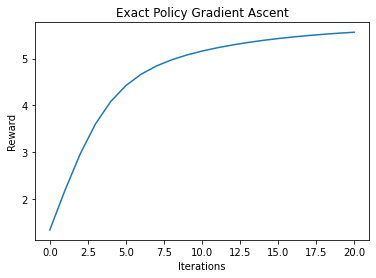

In [ ]:
lr = 0.1

params = torch.zeros([ns, na], requires_grad=True)
gamma = 0.8
policy = F.softmax(params, dim=-1)

step_num = 20
reward = [] # for recording each step's reward
analytic_value = policy_evaluation(P, R, gamma, policy)
reward.append(analytic_value[0].item())# Initial state value

for step in range(step_num):
  ### TODO: Implement policy gradient ascent ###
  analytic_value = policy_evaluation(P, R, gamma, policy)
  analytic_pg = policy_gradient(analytic_value[0], policy)
  params = params + lr * analytic_pg
  ### END TODO ###
  policy = F.softmax(params, dim=-1)
  analytic_value = policy_evaluation(P, R, gamma, policy)
  reward.append(analytic_value[0].item())
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.title('Exact Policy Gradient Ascent')
plt.plot(reward)
plt.show()

# Section II: Policy Gradient
In the previous section, we show the objective function and how to analtically calculate the value. However, in model-free RL, we typically have not access to the reward and transition matrix so we need to take samples to estimate the policy gradient. Luckily, we have a theorem that:


* For any differentiable policy $\pi(a|s)$, for any of the policy objective functions $J=J_{1}, J_{a v R}$, or $\frac{1}{1-\gamma} J_{a v} V$, the policy gradient is:
$$
\nabla_{\theta} J(\theta)=\mathbb{E}_{s,a\sim\pi_{\theta}}\left[\nabla_{\theta} \log \pi_{\theta}(a|s) Q^{\pi_{\theta}}(s, a)\right] \tag{3}
$$

And in our lecture, we prove the policy gradient theorem when the objective function is $\frac{1}{1-\gamma} J_{a v} V$.


## Q2: Estimated Policy Gradient in Tabular Markov Decision Process

When the environment dynamic is unknown for us, we need to use samples to estimate it based on the policy gradient theorem. In this exercise, we will give you the rollout function for samplilng results.

**You need to do the following things**:

* **Step I**: Fully read the rollout function to understand how it works
* **Step II**: Complete the **REINFORCE** function. Implement the function to estimate the policy gradient by REINFORCE algorithm. Then you can compare your estimated policy gradient with analytical policy gradient under different sample sizes.
* **Step III**: Implement the function to conduct estimated policy gradient ascent to increase the performance from uniform policy. Draw the plot between the return and step.

### Step I: Rollout function

Here we offer you the rollout function, youo need to understand how it works.

In [ ]:
def generate_trajectories(mdp, mu, num_simulations, T):
    """
    Generate trajectories from the MDP using policy mu
    Args:
    mdp: the mdp object
    mu: the policy to be executed
    num_simulations: num of trajectories
    T: truncated horizon of the trajectory
    Returns:
    A list of trajectories
    """
    trajs = []
    na = mu.shape[1]
    for i in range(num_simulations):
        rsum = []
        states = []
        actions = []
        s = mdp.reset()
        for t in range(T):
            a = np.random.choice(np.arange(na), p=mu[s])
            s_next, r, _, _ = mdp.step(a)
            rsum.append(r)
            actions.append(a)
            states.append(s)
            s = s_next
        states.append(s_next)
        trajs.append({'states': states, 'actions': actions, 'rewards': rsum})
    return trajs

### Step II: REINFORCE
REINFORCE is one classical algorithm that use monte-carlo sample to estimate $Q^{\pi_{\theta}}(s,a)$. The monte-carlo estimate refers to the cumulative return start from $s_t,a_t$ at time step $t$:
 $G_t = \sum_{k=0}^{k=\infty}\gamma^{k}R_{t+k} $.

The REINFORCE algorithm procedures are shown as follows:
<div align=center><img src="https://miro.medium.com/max/5520/1*NQkoA-eQOUXHqIln-WzMpw.png" width="500px" /></div>

In your implementation, we recommend you not to conduct the policy gradient ascent at each step. At each time you can sample $n$ trajectories where each trajectory has $m$ states. You can calculate the $n\times m$ terms of $G\ln\pi$ and calculate the average to become to final value. At last you can take the derivatives from this value w.r.t the policy by automatic differentiation.

**Tips**: Note that this procedures here has some discrepancies with the policy gradient theorem presented before: it uses $\gamma^{t} G \nabla_{\boldsymbol{\theta}} \ln \pi\left(A_{t} \mid S_{t}, \boldsymbol{\theta}\right)$ instead of $G \nabla_{\boldsymbol{\theta}} \ln \pi\left(A_{t} \mid S_{t}, \boldsymbol{\theta}\right)$. Only when $\gamma=1$, these two formulation become the same. The former one is unbiased while the latter one is commonly used in practice. We recommend you to use this unbiased version at this tabular example while you can use whatever you want in the next Cartpole example.

In [ ]:
def REINFORCE(pi, T, gamma, trajs):
	"""
	This evaluation subroutine is based on REINFORCE.
	Args:
		pi: target policy
		T: length of partial trajectories
		gamma: discount factor
		trajs: list of trajectories
	Returns:
		policy gradient
	"""
	evaluations = 0
	num_simulations = len(trajs)
	for i in range(num_simulations):
		traj = trajs[i]
		states, actions, rewards = traj['states'], traj['actions'], traj['rewards']
		v_estimate = 0
		all_estimates = []
		for s,a,r,s_next in zip(states[:-1][::-1], actions[::-1], rewards[::-1], states[1:][::-1]):
			### TODO: Implement calculation of monte-carlo estimate and G\ln\pi term ###
			### Reversely, iteratively calculate MC estimate
			### Then calculate policy loss based on REINFORCE algorithm
			v_estimate = r + gamma * v_estimate
			policy_loss = torch.log(pi[s,a] + 1e-8) * v_estimate
			### END
			all_estimates.append(policy_loss)
		all_estimates = all_estimates[::-1] # Reverse
		init_estimate = 0.0
		for step, estimate in enumerate(all_estimates):
			### TODO: Implement calculation discounted result over the whole trajectory
			### (the unbiased version mentioned in tips above)
			init_estimate += gamma**step * estimate
			### END
		evaluations = evaluations + (init_estimate)/num_simulations
	policy_gradient = torch.autograd.grad(evaluations, pi, retain_graph=True)[0] # calculate the final policy gradient
	return policy_gradient

### Step II: REINFORCE - comparison with analytical policy gradient

In this part, we want to compare our estimated policy gradient and analytical policy gradient to verify its correctness.

**You need to the following things**:

* We will evaluate the policy gradient at uniform policy by analytical solution and sampled solution with different sample sizes.
* Visualising the correlation&MSE distance between estimated policy gradient and analytical policy gradient and their relationship with sample size.

**Tips**: Note that there also exists one discrepancy between the setting of analytical solution and estimated solution. The analytical solution is taken under infinite episode length while we can only use episodic setting to get estimation in practice. So we set $\gamma=0.8$ and $T=40$ to make sure $\gamma^{T}$ is small enough.

In [ ]:
### Uniform policy andd analytical policy gradient
params = torch.zeros([ns, na], requires_grad=True)
policy = F.softmax(params, dim=-1)
analytic_value = policy_evaluation(P, R, gamma, policy)
analytic_pg = policy_gradient(analytic_value[0], policy)

In [ ]:
T = 40

### Correlation function is offered here, Mean square error can be computed by F.mse_loss,
### https://pytorch.org/docs/master/generated/torch.nn.functional.mse_loss.html#torch-nn-functional-mse-loss

def corr(x, y):
	"""
	Angular accuracy measure between tensors
	between -1 and 1, the higher the better

	Args:
		two tensors x and y
	Returns:
		Angular accuracy measure
	"""
	x = x.flatten()
	y = y.flatten()
	x -= np.mean(x)
	y -= np.mean(y)
	return x.dot(y) / np.sqrt(x.dot(x) * y.dot(y))

num_simulations_list = [2,4,8,16,32,64,256,512] #7 different sample size
# conduct 5 policy gradient estimation under the same setting
# Then take average to decrease the uncetainty brought by randomness
num_repeated_sample = 5
distance_list = []
corr_list = []
for num_simulations in num_simulations_list:
  mse_distance = 0
  corr_distance = 0
  for _ in range(num_repeated_sample):
		### TODO: Implement calculation discounted result over the whole trajectory
    trajs_all = generate_trajectories(mdp, policy.detach().numpy(), num_simulations, T)
    gradient = REINFORCE(policy, T, gamma, trajs_all)
    mse_distance += F.mse_loss(gradient, analytic_pg)/num_repeated_sample
    corr_distance += corr(gradient.numpy(), analytic_pg.numpy())/num_repeated_sample
		### END
  distance_list.append(mse_distance.item())
  corr_list.append(corr_distance)

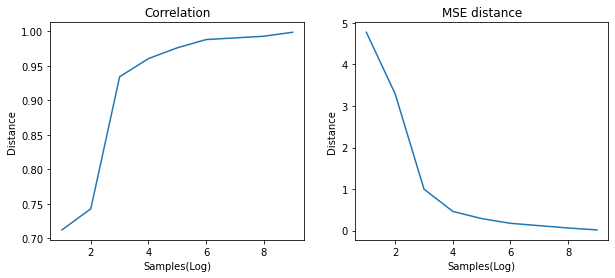

In [ ]:
### Visualising
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.xlabel('Samples(Log)')
plt.ylabel('Distance')
plt.title('Correlation')
plt.plot(np.log2(num_simulations_list), corr_list)

plt.subplot(1,2,2)
plt.plot(np.log2(num_simulations_list), distance_list)
plt.xlabel('Samples(Log)')
plt.ylabel('Distance')
plt.title('MSE distance')
plt.show()


### Step III: Estimated policy gradient ascent

In this part, **You need to the following things**:

* Based on the previous gradient estimation code, you need to conduct policy gradient ascent from the uniform distribution. All necessary parameters are offered.
* Visualising the reward-step plot.


In [ ]:
step_num = 20
num_simulations = 128
params = torch.zeros([ns, na], requires_grad=True)
reward = [] # for recording each step's reward
policy = F.softmax(params, dim=-1)
analytic_value = policy_evaluation(P, R, gamma, policy)
reward.append(analytic_value[0].item())# Initial value
for step in range(step_num):
  ### TODO: Implement estimated policy gradient ascent
  trajs_all = generate_trajectories(mdp, policy.detach().numpy(), num_simulations, T)
  gradient = REINFORCE(policy, T, gamma, trajs_all)
  params = params + lr * gradient
  ### END
  policy = F.softmax(params, dim=-1)
  analytic_value = policy_evaluation(P, R, gamma, policy)
  reward.append(analytic_value[0].item())

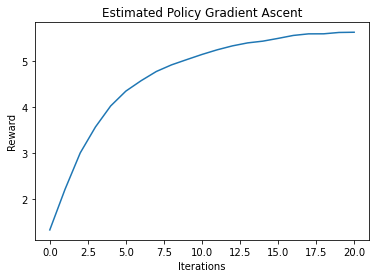

In [ ]:
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.title('Estimated Policy Gradient Ascent')
plt.plot(reward)
plt.show()

## Section III: Policy Gradient with Neural Network

In this part, we begin to focus on a more complex environment: Cartpole and use neural network to conduct policy gradient estimation and policy graident ascent.

**You need to do:**

**Step I**: Understand how the Cartpole works and all related code including policy network/memory. Implment REINFORCE algorithm.

**Step II**: Implement Actor-Critic algorithms and understand all realted code.

**Step III**: Rendering the video of Cartpole for the initial policy and final learned policy.

## Q3: Policy Gradient with Neural Network: Cartpole
In this part, we will give you a gym environment called **Cartpole**. In this environment, a pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.For more information of this environment, please refer to [Cartpole](https://gym.openai.com/envs/CartPole-v0/).
### Step I: REINFORCE algorithm
**You need to do:**
* Understand all utility function such as rollout function/memory function and in-class function we offer you.
* Complete the **Policy** class to creat a class for policy network.
* Complete the **REINFORCE** class. Complete the **select_action** function to select action given one state. Complete the **train** function to implement REINFORCE algorithm using neural network based policy.
* Visualing the reward/length-episode plot.

In [ ]:
import gym
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
import copy
gamma = 0.99
seed = 1

env = gym.make('CartPole-v0') # action dim=2, state dim=4
env.seed(seed)
torch.manual_seed(seed)

### We recommend a neural network with {[input_dim, 128], RELU(),[128, output_dim]}
class Policy(nn.Module):
  def __init__(self):
    super(Policy, self).__init__()
    ### TODO: Implment policy network
    self.l1 = nn.Linear(4, 128)
    self.l2 = nn.Linear(128, 2)
    ### END

  def forward(self, x):
    ### TODO: Implment policy network
    x = F.relu(self.l1(x))
    action = self.l2(x)
    ### END
    return F.softmax(action, dim=1)

# memory for storing the trajectory
class memory():
  def __init__(self):
    self.state = []
    self.action = []
    self.reward = []
  def reset(self):
    self.state = []
    self.action = []
    self.reward = []
  def insert(self,s,a,r):
    self.state.append(s)
    self.action.append(a)
    self.reward.append(r)
  def get_memory(self):
    return np.stack(self.state, axis=0), np.stack(self.action, axis=0), np.stack(self.reward, axis=0)

class REINFORCE():
  def __init__(self, policy):
    self.policy = policy
    self.poptim = optim.Adam(self.policy.parameters(), lr=1e-3)

  def select_action(self, state):
    ## sample action given one state
    ## For sampling you can refer to: https://pytorch.org/docs/master/distributions.html#categorical
    state = torch.from_numpy(state).float().unsqueeze(0)
    ### TODO: Implement function to sample action given the state/policy
    probs = self.policy(state)
    m = Categorical(probs)
    action = m.sample()
    ### END
    return action.item()

  def get_prob(self, state, action): ## get policy probability given state and action
    return self.policy(state)[torch.arange(len(state)), action]

  def train(self, m): # train policy
    state, action, reward = m.get_memory()
    state, action, reward = torch.tensor(state).float(), torch.tensor(action), torch.tensor(reward)
    prob = self.get_prob(state, action)
    value_all = []
    value = 0
    ### TODO: Implement function to calculate MC return for REINFORCE
    ### You can calculate it following previous reverse implementation
    ### Refer to https://pytorch.org/docs/master/generated/torch.flip.html?highlight=flip#torch.flip
    for r in reward.flip(dims=[0]):
      value = gamma * value + r
      value_all.append(value)
    ### END
    value_all = value_all[::-1]
    value_all = torch.tensor(value_all)
    ### TODO: Implement function to calculate policy loss
    policy_loss = -torch.sum(torch.log(prob+1e-8) * value_all)
    ### END
    self.poptim.zero_grad()
    policy_loss.backward()
    self.poptim.step()

def run_reinforce():
  policy = Policy()
  agent = REINFORCE(policy)
  agent_first = copy.deepcopy(agent)
  m = memory()
  all_reward = []
  all_length = []
  for i_episode in range(600):
    state = env.reset()
    m.reset()
    for _ in range(2000):  # Don't infinite loop while learning
      action = agent.select_action(state)
      next_state, reward, done, _ = env.step(action)
      m.insert(state, action, reward)
      state = next_state
      if done:
          break
    agent.train(m)
    reward = np.array(m.reward)
    discount_reward = np.sum(reward * np.array([gamma ** i for i in range(len(reward))])) # calculate discount reward
    all_reward.append(discount_reward)
    all_length.append(len(reward))

    if i_episode % 20 == 0:
      print('Episode ',i_episode,':',np.mean(all_reward[-20:]))

  return agent_first, agent, all_reward, all_length


In [ ]:
agent_first, agent, reward, length = run_reinforce()

Episode  0 : 16.548623854991238
Episode  20 : 19.64720150771737
Episode  40 : 22.901770286341115
Episode  60 : 38.869633487594925
Episode  80 : 39.245864162890356
Episode  100 : 43.7752275346901
Episode  120 : 37.0178350279434
Episode  140 : 46.381345319280264
Episode  160 : 64.63896548705372
Episode  180 : 69.68842811140162
Episode  200 : 68.19112647128688
Episode  220 : 79.44874303871048
Episode  240 : 78.98453371526004
Episode  260 : 78.07915923182102
Episode  280 : 75.90803481614036
Episode  300 : 83.43689252850167
Episode  320 : 83.54293259805492
Episode  340 : 84.4258546743072
Episode  360 : 85.6301283933423
Episode  380 : 85.18227307368923
Episode  400 : 84.96582105140308
Episode  420 : 86.39319438103769
Episode  440 : 85.8105379552603
Episode  460 : 86.60203251420376
Episode  480 : 86.60203251420376
Episode  500 : 84.7632434207177
Episode  520 : 83.22664212986315
Episode  540 : 86.36603050195774
Episode  560 : 86.23519535572714
Episode  580 : 81.86809137896185


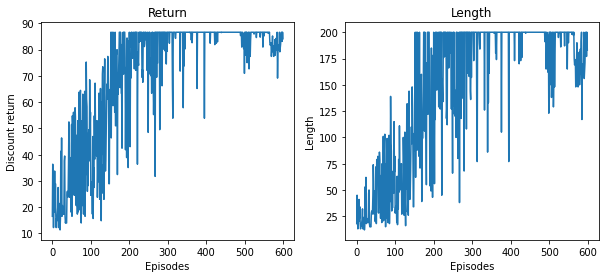

In [ ]:
#Visualing the discount return and length

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.xlabel('Episodes')
plt.ylabel('Discount return')
plt.title('Return')
plt.plot(reward)

plt.subplot(1,2,2)
plt.xlabel('Episodes')
plt.ylabel('Length')
plt.title('Length')
plt.plot(length)
plt.show()

### Step II: Actor-critic

Monte-Carlo estimated over Q function often brings in high-variance. In the part, we offer another solution to conduct RL: Actor-critic. In this framework, we use a parameterised critic to estimate the action-value function.
$$
Q_{w}(s, a) \approx Q^{\pi_{\theta}}(s, a)
$$

Actor-critic algorithms maintain two sets of parameters:
* Critic: Updates action-value function parameters w
* Actor: Updates policy parameters $\theta$, in direction
suggested by critic

Actor-critic algorithms follow an approximate policy gradient:
$$
\nabla_{\theta} J(\theta) \approx \mathbb{E}_{\pi_{\theta}}\left[\nabla_{\theta} \log \pi_{\theta}(s, a) Q_{w}(s, a)\right]
\tag{4}
$$

When learning the critic function, you can use the MSE loss betweenbetween $Q_w$ and Monte-Carlo estimate (same thing in REINFORCE) as the supervised objective.


$$
\min_{w}\mathbb{E}_{s_t,a_t\sim\pi_{\theta}}\left[\left(Q^{w}(s_t, a_t)-G_t\right)^{2}\right]
\tag{5}
$$


**You need to do the following things:**
* Complete the **QCritic** class to creat a class for policy network.
* Complete the **Actor_Critic** class. Complete the **select_action** function to select action given one state. Complete the **train** function to implement Actor-critic algorithm using neural network based policy.

In [ ]:
### We recommend a neural network with {[input_dim, 128], RELU(),[128, output_dim]}
env.seed(1)
torch.manual_seed(1)
class QCritic(nn.Module):
  def __init__(self):
    super(QCritic, self).__init__()
    ### TODO: Implment Qcritic network
    self.l1 = nn.Linear(4+1, 128)
    self.l2 = nn.Linear(128, 1)
    ### End

  def forward(self, x):
    ### TODO: Implment Qcritic network
    x = F.relu(self.l1(x))
    action_scores = self.l2(x)
    ### End
    return action_scores

class Actor_Critic():
  def __init__(self, policy, critic):
    self.policy = policy
    self.critic = critic
    self.poptim = optim.Adam(self.policy.parameters(), lr=1e-3)
    self.coptim = optim.Adam(self.critic.parameters(), lr=1e-3)

  def select_action(self, state):
    state = torch.from_numpy(state).float().unsqueeze(0)
    ### TODO: Implement function to sample action given the state/policy
    probs = self.policy(state)
    m = Categorical(probs)
    action = m.sample()
    ### END
    return action.item()

  def get_prob(self, state, action): ## get policy probability given state and action
    return self.policy(state)[torch.arange(len(state)), action]

  def get_value(self, state, action): ## get value given state and action
    return self.critic(torch.cat([state, action[:, None]], dim=-1))

  def train(self, m): # train policy and critic
    state, action, reward = m.get_memory()
    state, action, reward = torch.tensor(state).float(), torch.tensor(action), torch.tensor(reward).float()
    prob = self.get_prob(state, action)
    value_all = []
    value = 0

    # MC estimate
    ### TODO: Implement MC estimate, same as before
    for r in reward.flip(dims=[0]):
      value = gamma * value + r
      value_all.append(value)
    ### END
    value_all = value_all[::-1]
    value_all = torch.tensor(value_all)

    ### TODO: Implement critic loss by equation 5
    value = self.get_value(state, action.float())
    critic_loss = F.mse_loss(value.squeeze(dim=-1), value_all)
    ### END
    self.coptim.zero_grad()
    critic_loss.backward()
    self.coptim.step()

    ### TODO: Implement policy loss by equation 4
    ### Note that you can choose to use the updated critic to regenerate the value
    ### Or directly use previous value
    policy_loss = -torch.sum(torch.log(prob+1e-8) * value.detach())
    ### END
    self.poptim.zero_grad()
    policy_loss.backward()
    self.poptim.step()

def run_actor_critic():
  policy = Policy()
  critic = QCritic()
  agent = Actor_Critic(policy, critic)
  m = memory()
  all_reward = []
  all_length = []
  for i_episode in range(1000):
    state = env.reset()
    m.reset()
    for _ in range(2000):  # Don't infinite loop while learning
      action = agent.select_action(state)
      next_state, reward, done, _ = env.step(action)
      m.insert(state, action, reward)
      state = next_state
      if done:
          break
    agent.train(m)
    reward = np.array(m.reward)
    discount_reward = np.sum(reward * np.array([gamma ** i for i in range(len(reward))]))
    all_reward.append(discount_reward)
    all_length.append(len(reward))

    if i_episode % 20 == 0:
      print('Episode ',i_episode,':',np.mean(all_reward[-20:]))

  return agent_first, agent, all_reward, all_length

_, _, reward, length = run_actor_critic()

Episode  0 : 21.4321859192781
Episode  20 : 24.386925794432713
Episode  40 : 24.58672296169121
Episode  60 : 24.57178631248886
Episode  80 : 29.464738952427183
Episode  100 : 32.9215854855862
Episode  120 : 29.61026723150399
Episode  140 : 26.682789770131553
Episode  160 : 31.751466745420238
Episode  180 : 41.24401054382125
Episode  200 : 34.19475962134563
Episode  220 : 33.94518347547923
Episode  240 : 21.055444489744183
Episode  260 : 19.649311580030783
Episode  280 : 22.634786358496115
Episode  300 : 31.41535320259694
Episode  320 : 41.5209881162144
Episode  340 : 38.793139589807296
Episode  360 : 54.225999914875295
Episode  380 : 59.37424861792918
Episode  400 : 52.771629458327084
Episode  420 : 58.98297165281415
Episode  440 : 55.310574545615474
Episode  460 : 56.75363612514195
Episode  480 : 65.16602308788956
Episode  500 : 68.04404512664817
Episode  520 : 68.07714655310585
Episode  540 : 71.27686711261615
Episode  560 : 67.46828929262124
Episode  580 : 68.32875894900666
Episode 

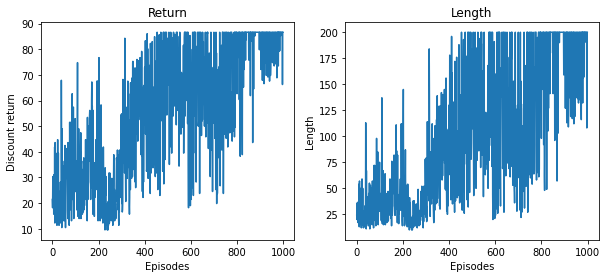

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.xlabel('Episodes')
plt.ylabel('Discount return')
plt.title('Return')
plt.plot(reward)

plt.subplot(1,2,2)
plt.xlabel('Episodes')
plt.ylabel('Length')
plt.title('Length')
plt.plot(length)
plt.show()

### Step III: Rendering environment
In this part, you just need to collect previous learned policy and render the Cartpole environment with your initial policy and final policy.

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get update > /dev/null 2>&1

In [ ]:
import gym
from gym.wrappers.record_video import RecordVideo
import glob
import io
import base64
from IPython.display import HTML
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay

display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment
and displaying it.
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else:
    print("Could not find video")
def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [ ]:
def show_policy(policy):
  env = wrap_env(gym.make('CartPole-v0'))
  state = env.reset()
  while True:
    env.render()
    #your agent goes here
    action = policy.select_action(state)
    state, reward, done, info = env.step(action)
    if done:
      break;
  env.close()
  show_video()

In [ ]:
show_policy(agent_first) ### render with the initial policy

In [ ]:
show_policy(agent) ### render with the final policy

NameError: ignored

# Reference
The illustration of policy gradient and actor-critic refers to:
* https://www.davidsilver.uk/wp-content/uploads/2020/03/pg.pdf

The analytical policy gradient code refers to:
* https://github.com/robintyh1/neurips2021-meta-gradient-offpolicy-evaluation

The REINFORCE algorithm refers to:
* http://incompleteideas.net/book/RLbook2020.pdf

The visualisation code of cartpole refers to:
* https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_12_01_ai_gym.ipynb